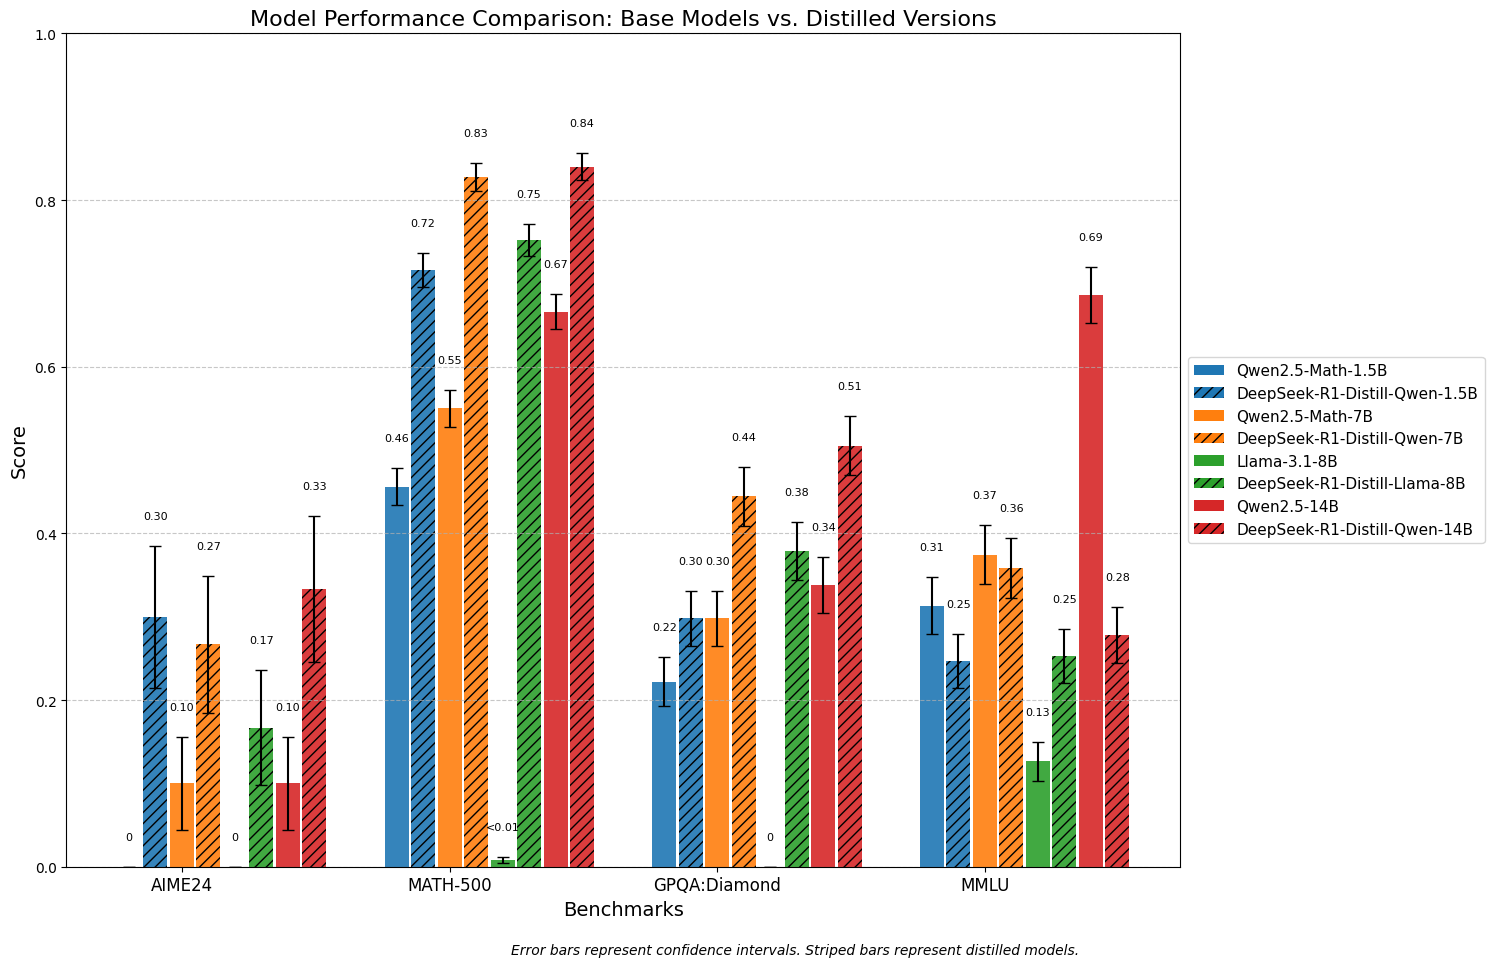

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define model names in pairs (base model followed by its distill)
models = [
    "Qwen2.5-Math-1.5B",
    "DeepSeek-R1-Distill-Qwen-1.5B",
    "Qwen2.5-Math-7B",
    "DeepSeek-R1-Distill-Qwen-7B",
    "Llama-3.1-8B",
    "DeepSeek-R1-Distill-Llama-8B", 
    "Qwen2.5-14B",
    "DeepSeek-R1-Distill-Qwen-14B"
]

# Define benchmarks (removing GSM8k)
benchmarks = ["AIME24", "MATH-500", "GPQA:Diamond", "MMLU"]

# Create data matrices for scores and confidence intervals (removing GSM8k column at index 3)
full_scores = np.array([
    [0.0, 0.456, 0.2222, 0.0, 0.3132],
    [0.3, 0.716, 0.298, 0.0, 0.247],
    [0.1, 0.55, 0.298, 0.8218, 0.3742],
    [0.2667, 0.828, 0.4444, 0.0099, 0.3584],
    [0.0, 0.008, 0.0, 0.0, 0.1263],
    [0.1667, 0.752, 0.3788, 0.0, 0.2527],
    [0.1, 0.666, 0.3384, 0.8453, 0.6863],
    [0.3333, 0.84, 0.5051, 0.0371, 0.2784]
])

# Remove GSM8k column (index 3)
scores = np.delete(full_scores, 3, axis=1)

# Confidence intervals - using the ± values (removing GSM8k column)
full_errors = np.array([
    [0.0, 0.0223, 0.0296, 0.0, 0.0345],
    [0.0851, 0.0202, 0.0326, 0.0, 0.0321],
    [0.0557, 0.0223, 0.0326, 0.0105, 0.0355],
    [0.0821, 0.0169, 0.0354, 0.0027, 0.0355],
    [0.0, 0.004, 0.0, 0.0, 0.0237],
    [0.0692, 0.0193, 0.0346, 0.0, 0.0324],
    [0.0557, 0.0211, 0.0337, 0.0100, 0.0336],
    [0.0875, 0.0164, 0.0356, 0.0052, 0.0335]
])

# Remove GSM8k column (index 3)
errors = np.delete(full_errors, 3, axis=1)

# Set up the figure and axes for better readability
plt.figure(figsize=(16, 10))
ax = plt.subplot(111)

# Width of each bar and spacing
bar_width = 0.09
index = np.arange(len(benchmarks))

# Define colors for model pairs (4 pairs = 4 colors)
pair_colors = [plt.cm.tab10.colors[i] for i in range(4)]

# Function to round scores for display
def format_score(score):
    if score == 0:
        return "0"
    elif score < 0.01:
        return "<0.01"
    else:
        return f"{score:.2f}"

# Plot each model's performance in pairs
for i in range(0, len(models), 2):
    # Base model (solid)
    base_bars = plt.bar(
        index + (i//2) * bar_width * 2.2 - (4 * bar_width * 1.1 / 2),
        scores[i],
        bar_width,
        alpha=0.9,
        label=models[i],
        color=pair_colors[i//2],
        yerr=errors[i],
        capsize=4
    )
    
    # Add text labels for base model
    for j, bar in enumerate(base_bars):
        height = bar.get_height()
        error = errors[i, j]
        # Position the label above the error bar
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + error + 0.03,
            format_score(scores[i, j]),
            ha='center',
            va='bottom',
            fontsize=8,
            rotation=0
        )
    
    # Distill model (striped)
    distill_bars = plt.bar(
        index + (i//2) * bar_width * 2.2 - (4 * bar_width * 1.1 / 2) + bar_width * 1.1,
        scores[i+1],
        bar_width,
        alpha=0.9,
        label=models[i+1],
        color=pair_colors[i//2],
        hatch='///',
        yerr=errors[i+1],
        capsize=4
    )
    
    # Add text labels for distill model
    for j, bar in enumerate(distill_bars):
        height = bar.get_height()
        error = errors[i+1, j]
        # Position the label above the error bar
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + error + 0.03,
            format_score(scores[i+1, j]),
            ha='center',
            va='bottom',
            fontsize=8,
            rotation=0
        )

# Add labels, title, and legend
plt.xlabel('Benchmarks', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Model Performance Comparison: Base Models vs. Distilled Versions', fontsize=16)
plt.xticks(index, benchmarks, fontsize=12)
plt.ylim(0, 1.0)  # Set y-axis limits for better visualization

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Shrink current axis to make room for legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])

# Create a custom legend with model pairs grouped visually
from matplotlib.patches import Patch
legend_elements = []
for i in range(0, len(models), 2):
    legend_elements.append(Patch(facecolor=pair_colors[i//2], label=models[i]))
    legend_elements.append(Patch(facecolor=pair_colors[i//2], hatch='///', label=models[i+1]))

plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11)

# Add explanatory notes
plt.figtext(0.5, 0.01, 'Error bars represent confidence intervals. Striped bars represent distilled models.', 
           ha='center', fontsize=10, style='italic')

plt.tight_layout(rect=[0, 0.03, 0.75, 0.97])
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [35]:
from datasets import load_dataset
# open-r1/OpenR1-Math-cn_k12-86k
openr1_source = load_dataset("open-r1/OpenR1-Math-220k", "extended")
cn_k12_86k =  openr1_source.filter(lambda example: example["source"] == "cn_k12", num_proc=32)
# cn_k12_86k.push_to_hub("Neelectric/OpenR1-Math-cn_k12-86k")
# cn_k12_86k['train'][0]

In [36]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("allenai/OLMo-2-1124-7B-Instruct")
first = cn_k12_86k["train"][0]
tokenizer.chat_template = "{{ bos_token }}{% for message in messages %}{% if loop.first and messages[0]['role'] != 'system' %}{{ '<|system|>\nYou are a helpful AI Assistant that provides well-reasoned and detailed responses. You first think about the reasoning process as an internal monologue and then provide the user with the answer. Respond in the following format: <think>\n...\n</think>\n<answer>\n...\n</answer>\n<|user|>' + message['content'] + '\n' }}{% elif message['role'] == 'system' %}{{ '<|system|>\n' + message['content'] + '\n' }}{% elif message['role'] == 'user' %}{{ '<|user|>\n' + message['content'] + '\n' }}{% elif message['role'] == 'assistant' %}{% if not loop.last %}{{ '<|assistant|>\n'  + message['content'] + eos_token + '\n' }}{% else %}{{ '<|assistant|>\n'  + message['content'] + eos_token }}{% endif %}{% endif %}{% if loop.last and add_generation_prompt %}{{ '<|assistant|>\n' }}{% endif %}{% endfor %}"
templated = tokenizer.apply_chat_template(first["messages"], tokenize=True)
print(len(templated))
# for elt in templated:
#     print(elt)

2137


In [37]:
tokenized = cn_k12_86k.map(
    lambda x: {"tokenized": tokenizer.apply_chat_template(x["messages"], tokenize=True, truncation=False, add_generation_prompt=False, return_tensors="np")},
    num_proc=32,
    keep_in_memory=True,
    remove_columns=['problem', 'solution', 'answer', 'problem_type', 'question_type', 'source', 'uuid', 'is_reasoning_complete', 'generations', 'correctness_math_verify', 'correctness_llama', 'finish_reasons', 'correctness_count', "messages"]
    )

Map (num_proc=16): 100%|██████████| 91449/91449 [06:53<00:00, 220.98 examples/s] 


In [42]:
len(tokenized["train"]["tokenized"][0])
tokenized["train"]["tokenized"][0]

[[100257,
  27,
  91,
  9125,
  91,
  397,
  2675,
  527,
  264,
  11190,
  15592,
  22103,
  430,
  5825,
  1664,
  5621,
  1525,
  291,
  323,
  11944,
  14847,
  13,
  1472,
  1176,
  1781,
  922,
  279,
  33811,
  1920,
  439,
  459,
  5419,
  1647,
  77828,
  323,
  1243,
  3493,
  279,
  1217,
  449,
  279,
  4320,
  13,
  40633,
  304,
  279,
  2768,
  3645,
  25,
  366,
  27963,
  397,
  9522,
  524,
  27963,
  397,
  27,
  9399,
  397,
  9522,
  524,
  9399,
  397,
  27,
  91,
  882,
  91,
  29,
  791,
  24524,
  315,
  279,
  12960,
  449,
  37442,
  362,
  4172,
  18,
  11,
  482,
  16,
  8,
  323,
  426,
  7,
  20,
  11,
  220,
  20,
  8,
  439,
  279,
  23899,
  374,
  33771,
  627,
  27,
  91,
  78191,
  91,
  397,
  14023,
  771,
  397,
  33413,
  11,
  779,
  358,
  1205,
  311,
  1505,
  279,
  24524,
  315,
  264,
  12960,
  1405,
  279,
  37442,
  315,
  279,
  23899,
  527,
  2728,
  439,
  3585,
  362,
  4172,
  18,
  11,
  482,
  16,
  8,
  323,
  426,
  7,
  20,


In [39]:
flattened = [inner_list for inner_list in tokenized["train"]["tokenized"]]
len(flattened[0])

1

In [40]:
lengths = [len(item) for item in tokenized["train"]["tokenized"]]  # Calculate the lengths of each list

# Count the number of prompts longer than 4096 tokens
long_prompts_count = sum(1 for length in lengths if length < 4096)

print(f"Number of prompts longer than 4096 tokens: {long_prompts_count}")

Number of prompts longer than 4096 tokens: 91449


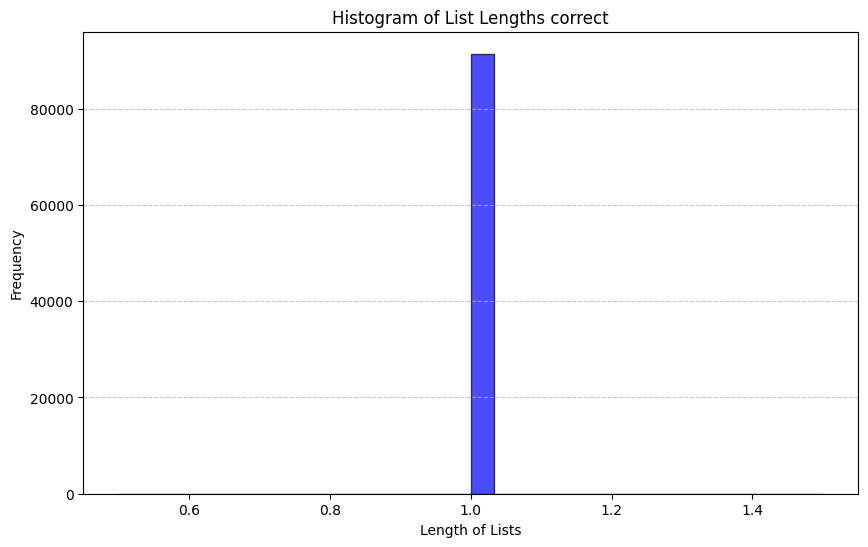

In [41]:
import matplotlib.pyplot as plt

# Assuming `flattened` is your list of lists
lengths = [len(item) for item in flattened]  # Calculate the lengths of each list

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of List Lengths correct')
plt.xlabel('Length of Lists')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [21]:
import torch

# a = torch.rand(4,4)
# b = torch.rand(4,4)
a = torch.tensor([[0.5254, 0.8263, 0.1103, 0.6887],
        [0.7013, 0.7164, 0.6873, 0.9029],
        [0.6708, 0.8965, 0.9968, 0.5985],
        [0.9541, 0.2370, 0.1919, 0.3051]])
changes = torch.normal(mean=0.25, std=0.01, size=(4,4))
# b = a - changes
b = torch.tensor([[ 0.2809,  0.5760, -0.1527,  0.4445],
        [ 0.4645,  0.4603,  0.4453,  0.6472],
        [ 0.4006,  0.6414,  0.7197,  0.3567],
        [ 0.7122, -0.0041, -0.0389,  0.0560]])
print("a", a)
print("b", b)
diff = a - b
print("diff", diff)
torch.mean(diff)

a tensor([[0.5254, 0.8263, 0.1103, 0.6887],
        [0.7013, 0.7164, 0.6873, 0.9029],
        [0.6708, 0.8965, 0.9968, 0.5985],
        [0.9541, 0.2370, 0.1919, 0.3051]])
b tensor([[ 0.2809,  0.5760, -0.1527,  0.4445],
        [ 0.4645,  0.4603,  0.4453,  0.6472],
        [ 0.4006,  0.6414,  0.7197,  0.3567],
        [ 0.7122, -0.0041, -0.0389,  0.0560]])
diff tensor([[0.2445, 0.2503, 0.2630, 0.2442],
        [0.2368, 0.2561, 0.2420, 0.2557],
        [0.2702, 0.2551, 0.2771, 0.2418],
        [0.2419, 0.2411, 0.2308, 0.2491]])


tensor(0.2500)

In [24]:
c = torch.rand(3,3)
changes = torch.normal(mean=0.25, std=0.01, size=(3,3))


print("c", c)
print("changes", changes)






c tensor([[0.5731, 0.8768, 0.2054],
        [0.1616, 0.6533, 0.2414],
        [0.4180, 0.3704, 0.3781]])
changes tensor([[0.2559, 0.2604, 0.2494],
        [0.2437, 0.2495, 0.2608],
        [0.2467, 0.2613, 0.2591]])


In [8]:
norm_of_diff = torch.linalg.norm(a - b).item()
norm_of_base = torch.linalg.norm(a).item()
print(norm_of_diff)
print(norm_of_base)
torch.sum(torch.abs(a - b))

1.4447088241577148
2.7276062965393066


tensor(4.7265)

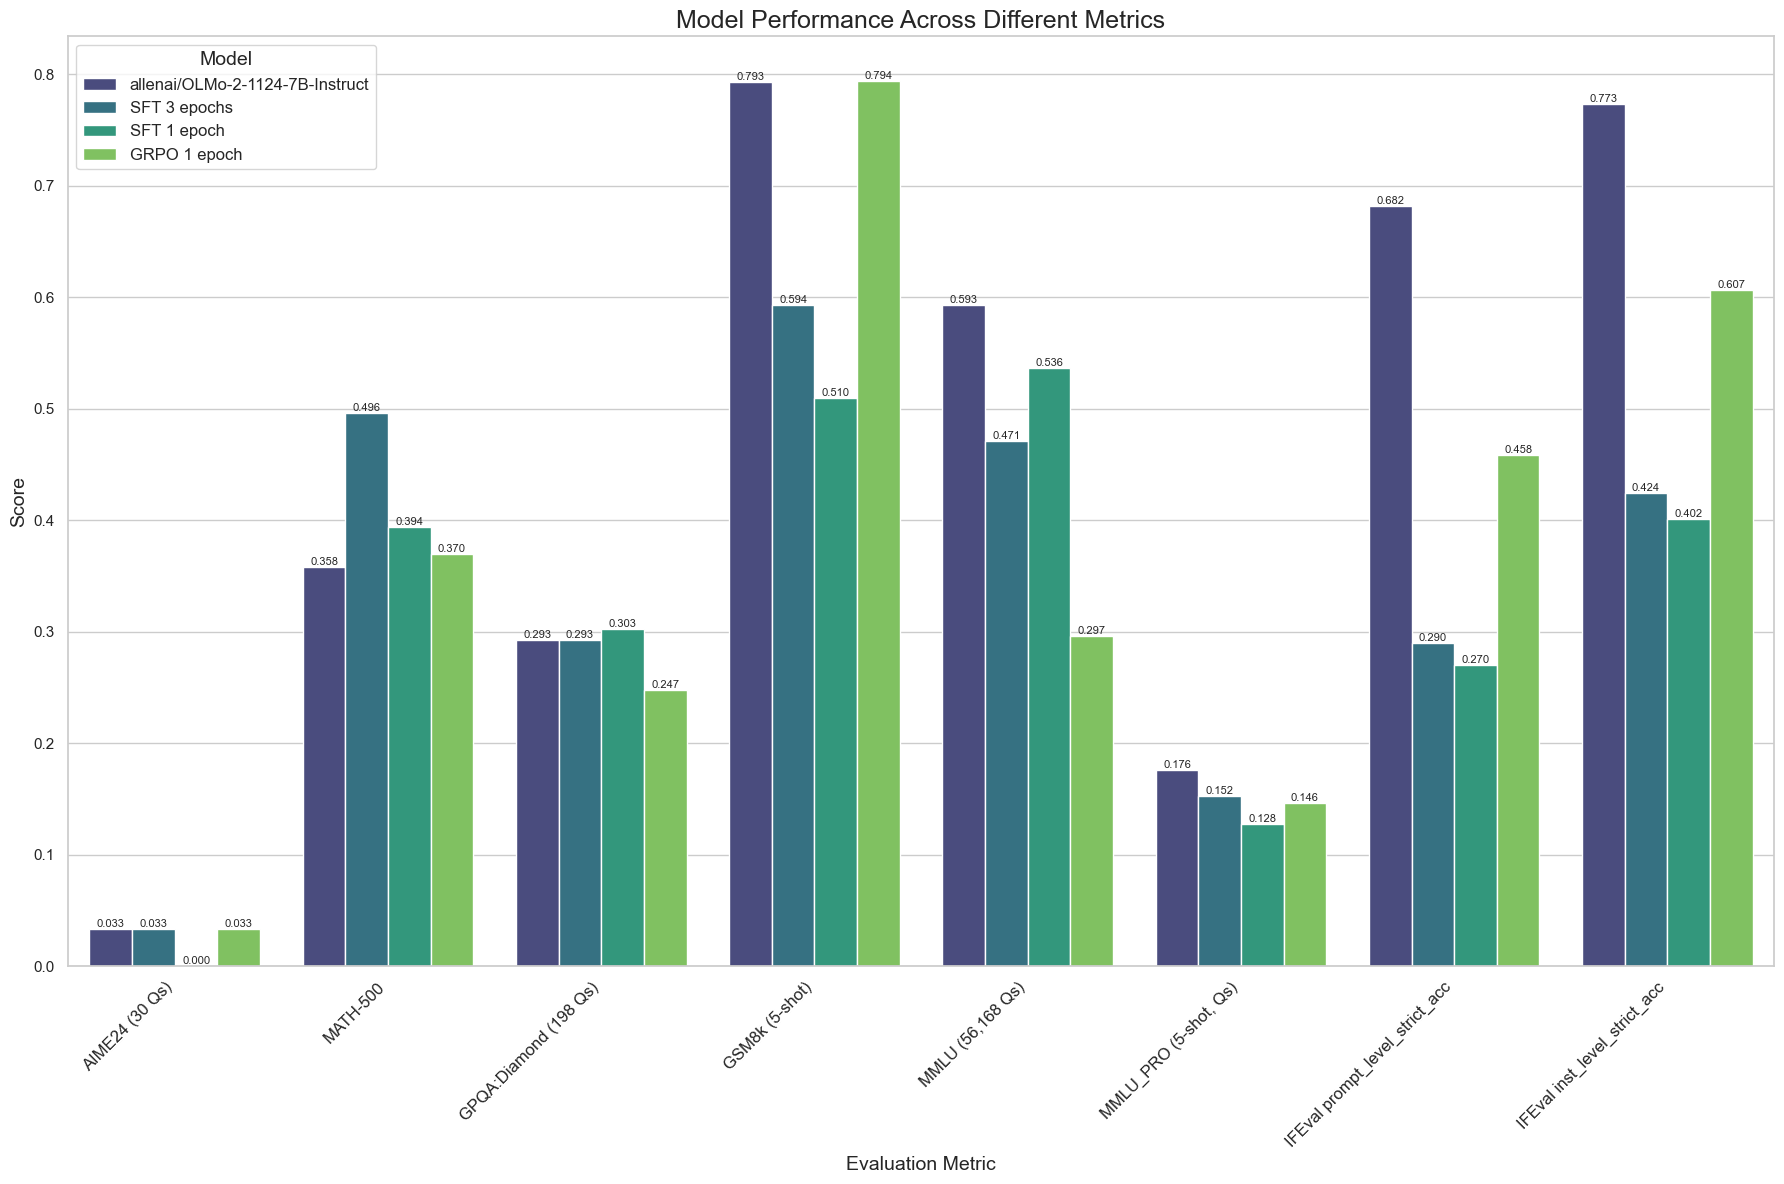

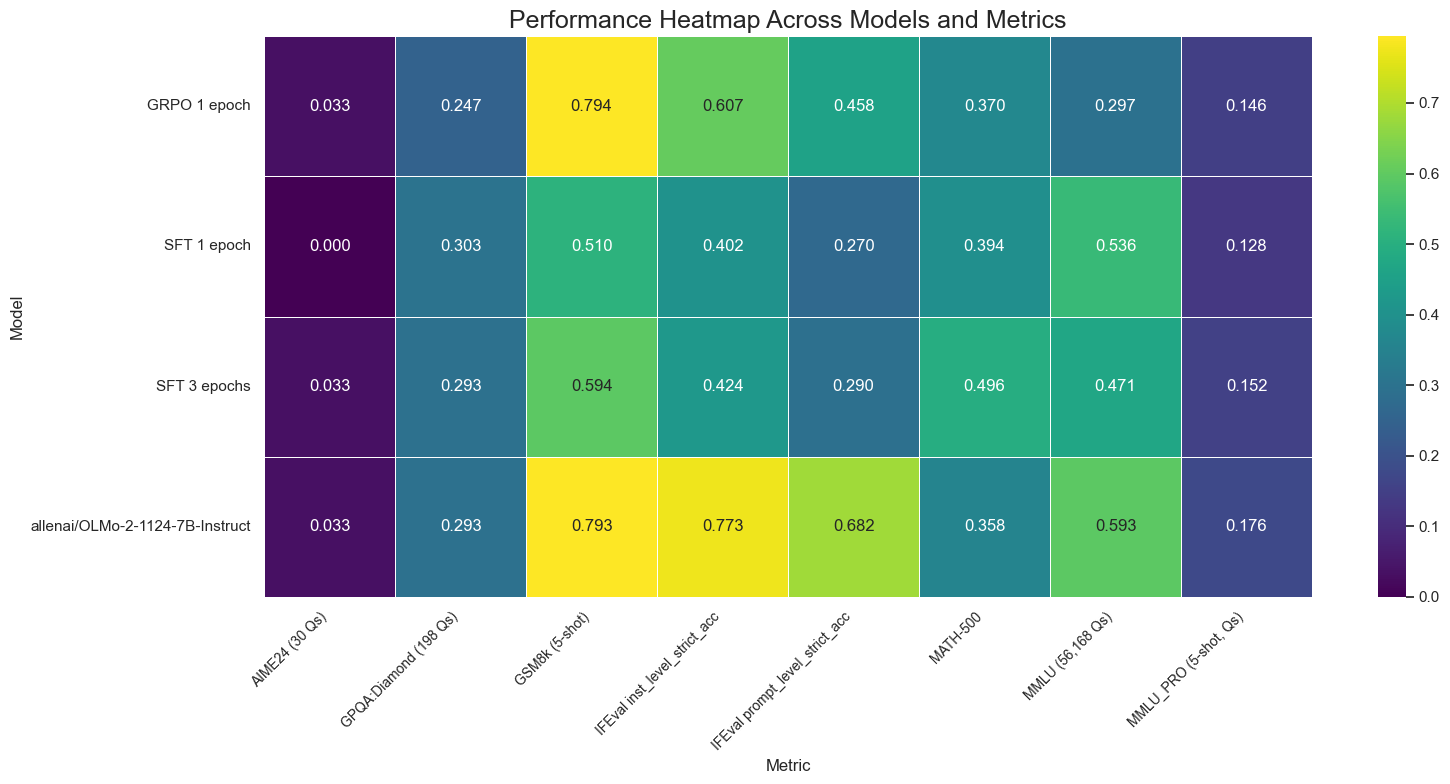

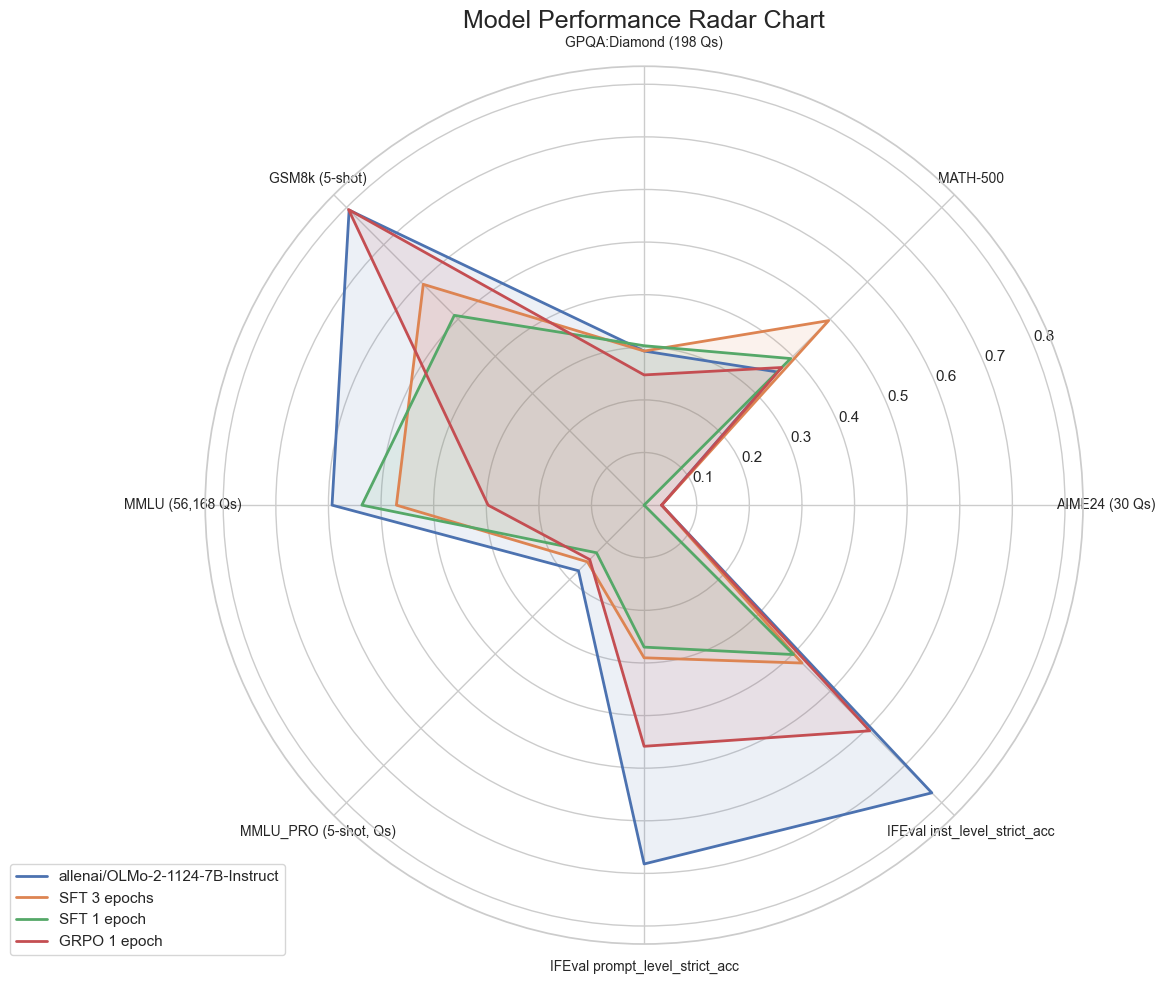

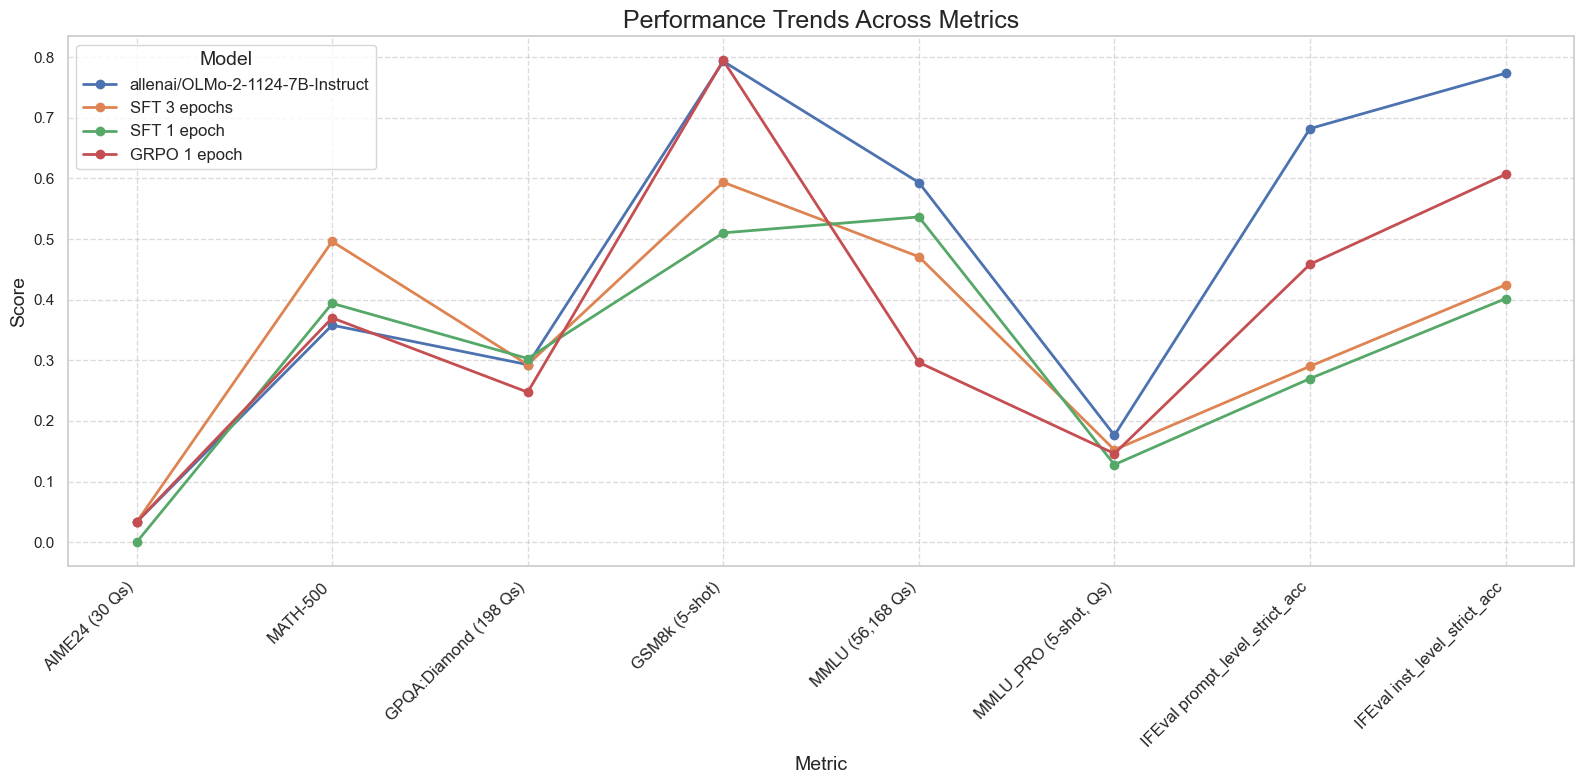

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create the dataframe from the given data
data = {
    'Model': [
        'allenai/OLMo-2-1124-7B-Instruct',
        'SFT 3 epochs',  # Renamed from Neelectric/OLMo-2-1124-7B-Instruct_SFTv00.08
        'SFT 1 epoch',   # Renamed from Neelectric/OLMo-2-1124-7B-Instruct_SFTv00.09
        'GRPO 1 epoch'   # Renamed from Neelectric/OLMo-2-1124-7B-Instruct_GRPOv00.10
    ],
    'AIME24 (30 Qs)': [0.0333, 0.0333, 0, 0.0333],
    'MATH-500': [0.358, 0.496, 0.394, 0.37],
    'GPQA:Diamond (198 Qs)': [0.2929, 0.2929, 0.303, 0.2475],
    'GSM8k (5-shot)': [0.7930, 0.5936, 0.5102, 0.7945],
    'MMLU (56,168 Qs)': [0.5932, 0.4709, 0.5365, 0.2966],
    'MMLU_PRO (5-shot, Qs)': [0.1764, 0.1524, 0.128, 0.1462],
    'IFEval prompt_level_strict_acc': [0.6821, 0.2902, 0.2699, 0.4584],
    'IFEval inst_level_strict_acc': [0.7734, 0.4245, 0.4017, 0.6067]
}

# Create DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
melted_df = pd.melt(df, id_vars=['Model'], var_name='Metric', value_name='Score')

# Set up the plot style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

# Create a grouped barplot
plot = sns.barplot(
    x='Metric', 
    y='Score', 
    hue='Model', 
    data=melted_df,
    palette='viridis'
)

# Customize the plot
plt.title('Model Performance Across Different Metrics', fontsize=18)
plt.xlabel('Evaluation Metric', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Model', fontsize=12, title_fontsize=14)
plt.tight_layout()

# Add value labels on bars
for container in plot.containers:
    plot.bar_label(container, fmt='%.3f', fontsize=8)

plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
plt.show()

# Let's also create a heatmap for a different visualization
plt.figure(figsize=(16, 8))
pivot_df = melted_df.pivot(index='Model', columns='Metric', values='Score')
sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt='.3f', linewidths=.5)
plt.title('Performance Heatmap Across Models and Metrics', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.savefig('model_performance_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Create a radar chart for another perspective
metrics = df.columns[1:].tolist()
values = df.iloc[:, 1:].values

# Create a figure
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, polar=True)

# Set the angles for each metric
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Close the loop

# Plot each model
for i, model in enumerate(df['Model']):
    values_model = df.iloc[i, 1:].values.tolist()
    values_model += values_model[:1]  # Close the loop
    ax.plot(angles, values_model, linewidth=2, label=model)
    ax.fill(angles, values_model, alpha=0.1)

# Set the labels and customize
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=10)
plt.xticks(rotation=45)
ax.set_title('Model Performance Radar Chart', fontsize=18)
ax.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.tight_layout()
plt.savefig('model_performance_radar.png', dpi=300, bbox_inches='tight')
plt.show()

# Create a line plot to highlight performance trends across metrics
plt.figure(figsize=(16, 8))
for i, model in enumerate(df['Model']):
    plt.plot(metrics, df.iloc[i, 1:].values, marker='o', linewidth=2, label=model)

plt.title('Performance Trends Across Metrics', fontsize=18)
plt.xlabel('Metric', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Model', fontsize=12, title_fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('model_performance_trends.png', dpi=300, bbox_inches='tight')
plt.show()

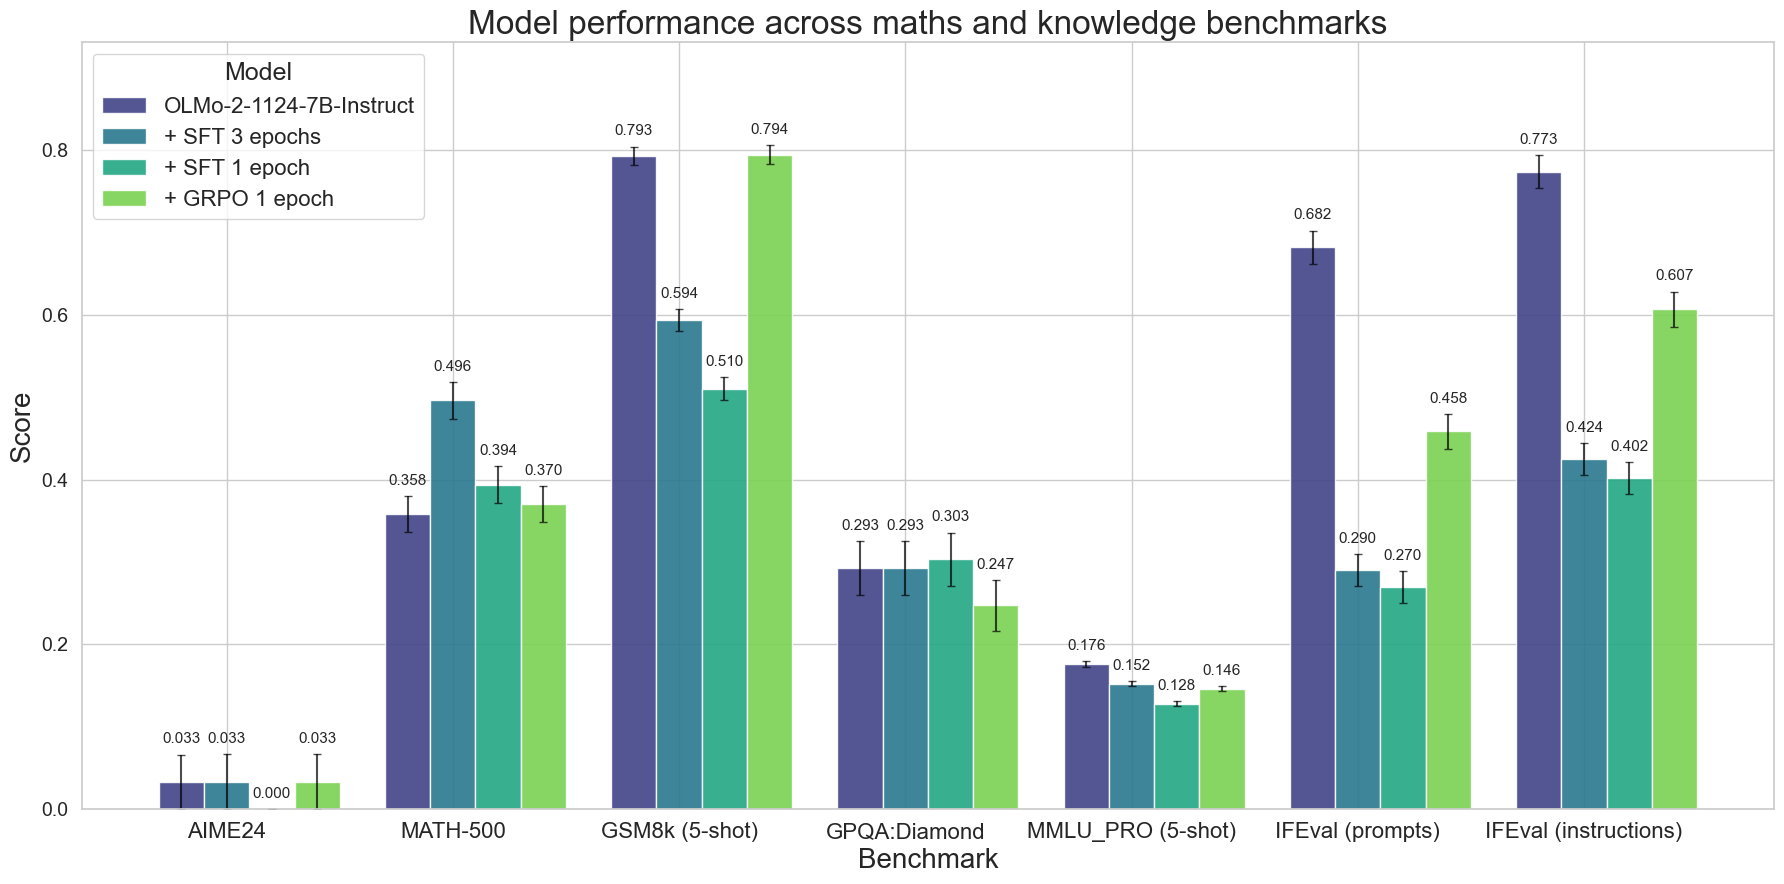

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create the dataframe from the given data
data = {
    'Model': [
        'OLMo-2-1124-7B-Instruct',
        '+ SFT 3 epochs',  # Renamed from Neelectric/OLMo-2-1124-7B-Instruct_SFTv00.08
        '+ SFT 1 epoch',   # Renamed from Neelectric/OLMo-2-1124-7B-Instruct_SFTv00.09
        '+ GRPO 1 epoch'   # Renamed from Neelectric/OLMo-2-1124-7B-Instruct_GRPOv00.10
    ],
    'AIME24': [0.0333, 0.0333, 0, 0.0333],
    'AIME24_err': [0.033, 0.0333, 0, 0.0333],
    'MATH-500': [0.358, 0.496, 0.394, 0.37],
    'MATH-500_err': [0.0215, 0.0224, 0.0219, 0.0216],
    'GSM8k (5-shot)': [0.7930, 0.5936, 0.5102, 0.7945],
    'GSM8k_err': [0.0112, 0.0135, 0.0138, 0.0111],
    'GPQA:Diamond': [0.2929, 0.2929, 0.303, 0.2475],
    'GPQA:Diamond_err': [0.0324, 0.0324, 0.0327, 0.0307],
    'MMLU_PRO (5-shot)': [0.1764, 0.1524, 0.128, 0.1462],
    'MMLU_PRO_err': [0.0035, 0.0033, 0.003, 0.0032],
    'IFEval (prompts)': [0.6821, 0.2902, 0.2699, 0.4584],
    'IFEval prompt_err': [0.0200, 0.0195, 0.0191, 0.0214],
    'IFEval (instructions)': [0.7734, 0.4245, 0.4017, 0.6067],
    'IFEval inst_err': [0.0005, 0.0005, 0.0005, 0.0005]
}

# Create DataFrame
df = pd.DataFrame(data)

# Extract metric names and their corresponding error columns
metrics = []
error_columns = {}
for col in df.columns:
    if col != 'Model' and not col.endswith('_err'):
        metrics.append(col)
        # Find the corresponding error column
        error_col = next((c for c in df.columns if c.startswith(col.split(' ')[0]) and c.endswith('_err')), None)
        if error_col:
            error_columns[col] = error_col

# Set up the plot style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 9))

# Plot bars for each metric and model
bar_width = 0.2
x = np.arange(len(metrics))
models = df['Model'].unique()

# Create a color palette
palette = sns.color_palette("viridis", len(models))

for i, model in enumerate(models):
    # Get model data
    model_data = df[df['Model'] == model]
    values = [model_data[metric].values[0] for metric in metrics]
    errors = [model_data[error_columns[metric]].values[0] for metric in metrics]
    
    # Plot bars
    bars = plt.bar(x + i*bar_width - bar_width*1.5, values, bar_width, 
            label=model, color=palette[i], alpha=0.9)
    
    # Add value labels above bars and leave space for error bars
    for j, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + errors[j] + 0.01, 
                f'{values[j]:.3f}', ha='center', va='bottom', fontsize=11)
    
    # Add error bars that don't overlap with labels
    plt.errorbar(x + i*bar_width - bar_width*1.5, values, yerr=errors, fmt='none', 
                capsize=3, ecolor='black', alpha=0.7)

# Customize the plot
plt.title('Model performance across maths and knowledge benchmarks', fontsize=24)
plt.xlabel('Benchmark', fontsize=20)
plt.ylabel('Score', fontsize=20)
plt.xticks(x - bar_width/2, metrics, fontsize=16)
plt.yticks(fontsize=14)
plt.legend(title='Model', fontsize=16, title_fontsize=18)
plt.tight_layout()

# Add a small padding to the y-axis to ensure error bars and labels don't get cut off
plt.ylim(0, plt.ylim()[1] * 1.1)

plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
plt.show()

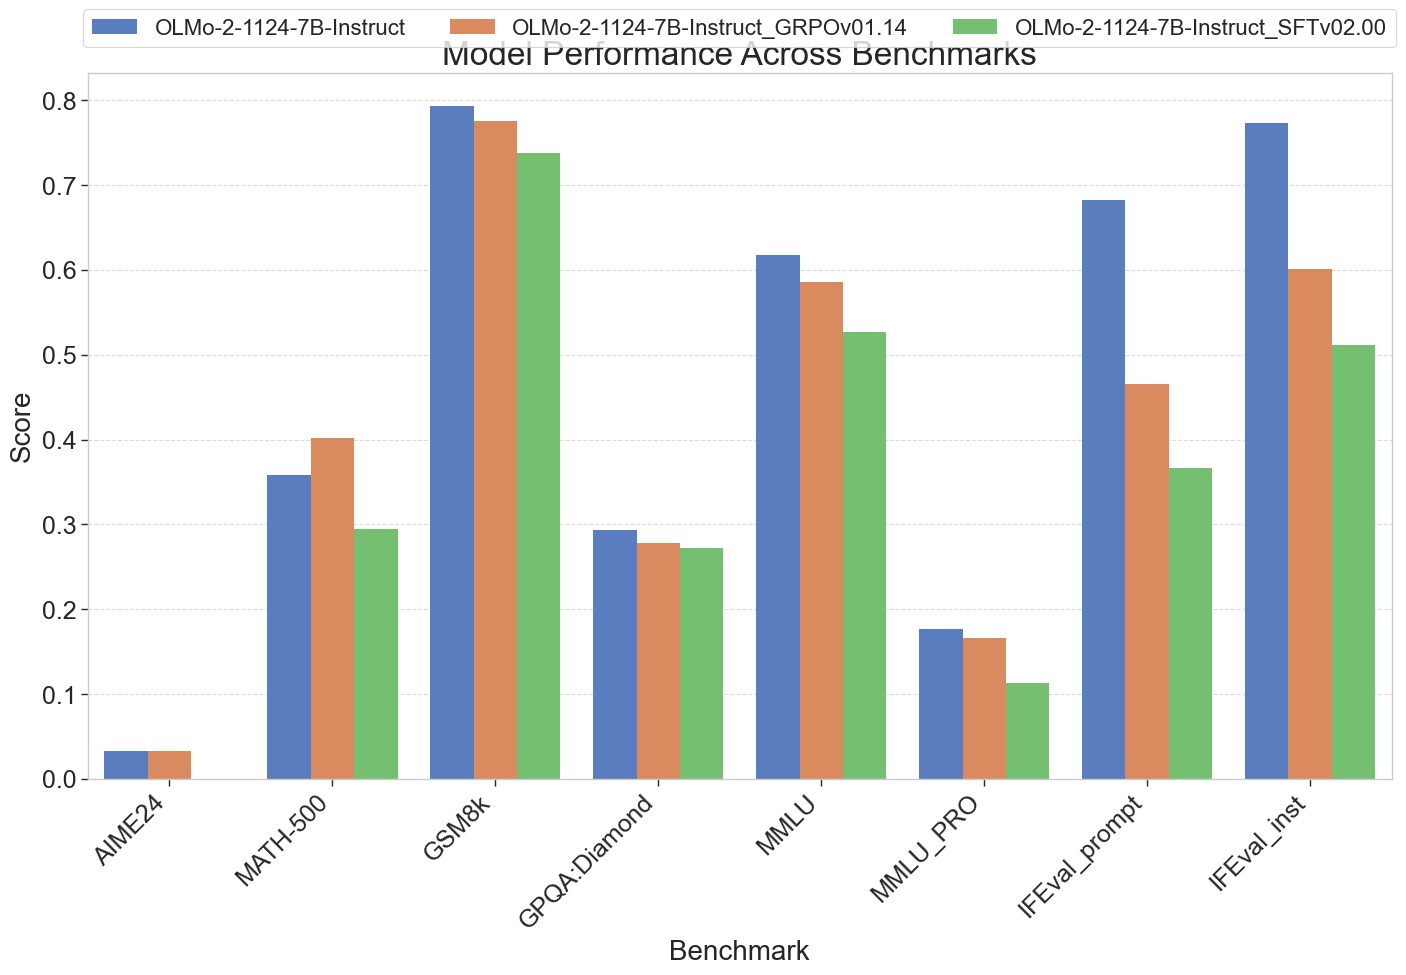

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the style for paper publication
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.5)  # Larger font for paper readability

# Create DataFrame from the data
data = {
    'Model': [
        'OLMo-2-1124-7B-Instruct',
        'OLMo-2-1124-7B-Instruct_GRPOv01.14',
        'OLMo-2-1124-7B-Instruct_SFTv02.00'
    ],
    'AIME24': [0.0333, 0.0333, 0.000],
    'MATH-500': [0.358, 0.402, 0.294],
    'GSM8k': [0.7930, 0.7756, 0.7384],
    'GPQA:Diamond': [0.2929, 0.2778, 0.2727],
    'MMLU': [0.6180, 0.5858, 0.5270],
    'MMLU_PRO': [0.1764, 0.1666, 0.1129],
    'IFEval_prompt': [0.6821, 0.4658, 0.3660],
    'IFEval_inst': [0.7734, 0.6007, 0.5120]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert to long format for easier plotting
df_long = pd.melt(df, id_vars=['Model'], var_name='Benchmark', value_name='Score')

# Define a nice color palette
palette = sns.color_palette("muted", 3)

# Create the plot
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Benchmark', y='Score', hue='Model', data=df_long, palette=palette)

# Add labels and title
plt.xlabel('Benchmark', fontsize=20)
plt.ylabel('Score', fontsize=20)
plt.title('Model Performance Across Benchmarks', fontsize=24)

# Make the legend larger and place it at the top
plt.legend(bbox_to_anchor=(0.5, 1.02), loc='lower center', 
           ncol=3, fontsize=16, frameon=True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize=18)

# Adjust the plot to make room for the labels
plt.tight_layout()

# Add grid lines for easier reading
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

IndexError: single positional indexer is out-of-bounds

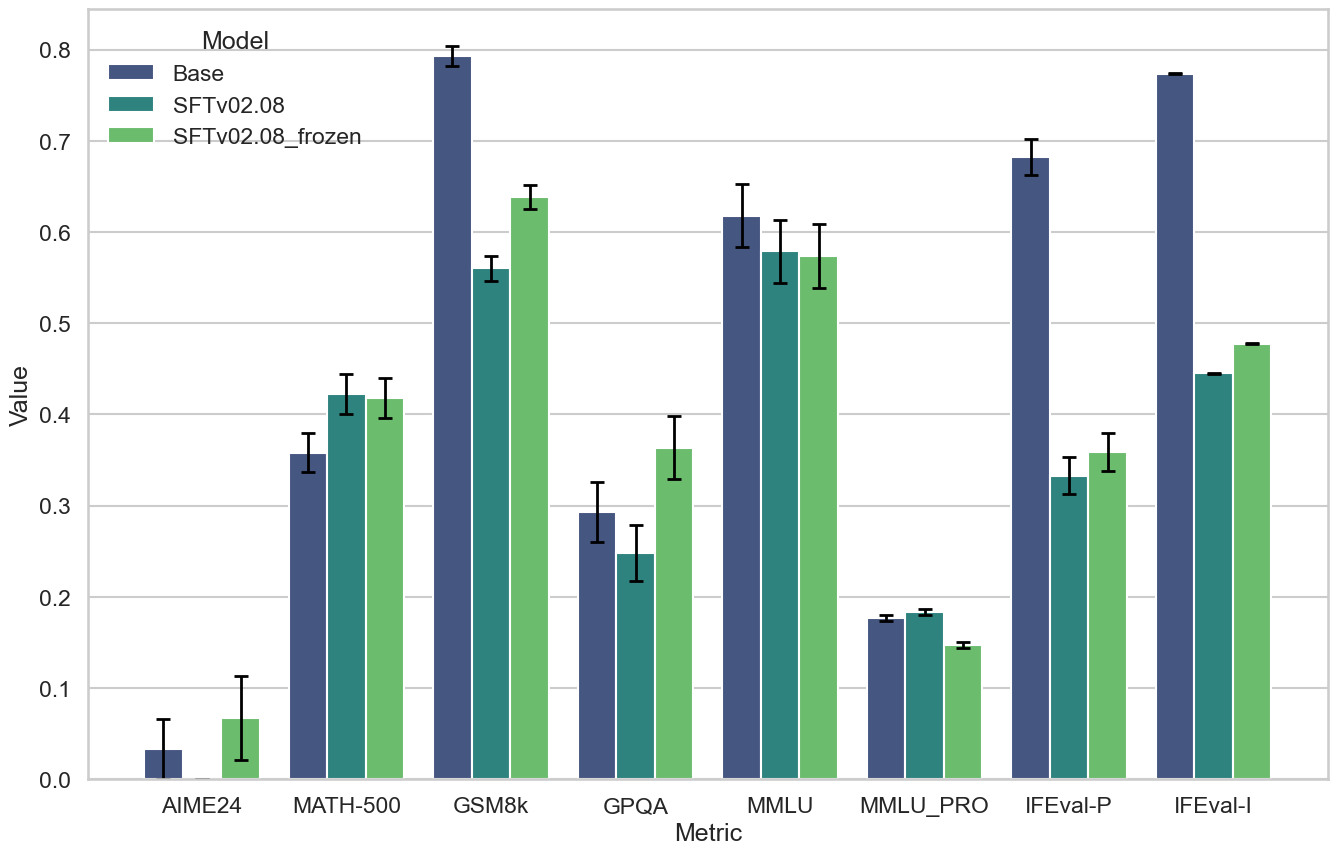

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the given data
data = {
    'Model': [
        'allenai/OLMo-2-1124-7B-Instruct',
        'Neelectric/OLMo-2-1124-7B-Instructct_SFTv02.08 (3 epochs, lr 5e-5, CN-K12_4096toks)',
        'Neelectric/OLMo-2-1124-7B-Instruct_SFTv02.08_frozen'
    ],
    'AIME24': ['0.0333±0.033', '0.0000±0.0000', '0.0667±0.0463'],
    'MATH-500': ['0.358±0.0215', '0.422±0.0221', '0.418±0.0221'],
    'GSM8k': ['0.7930±0.0112', '0.5603±0.0137', '0.6384±0.0132'],
    'GPQA': ['0.2929±0.0324', '0.2475±0.0307', '0.3636±0.0343'],
    'MMLU': ['0.6180±0.0344', '0.5788±0.0347', '0.5736±0.0348'],
    'MMLU_PRO': ['0.1764±0.0035', '0.1829±0.0035', '0.1474±0.0032'],
    'IFEval-P': ['0.6821±0.0200', '0.3327±0.0203', '0.3586±0.0206'],
    'IFEval-I': ['0.7734±0.0005', '0.4448±0.0005', '0.4772±0.0005']
}

df = pd.DataFrame(data)

# Function to split the value and error from strings like "0.1234±0.0567"
def split_value_error(val_str):
    parts = val_str.split('±')
    return float(parts[0]), float(parts[1])

# Create a melted DataFrame for easier plotting with seaborn
metrics = df.columns[1:]  # All columns except 'Model'
melted_data = []

for model in df['Model']:
    for metric in metrics:
        val_str = df.loc[df['Model'] == model, metric].iloc[0]
        value, error = split_value_error(val_str)
        # Use shorter model names for readability
        if 'allenai' in model:
            display_name = 'Base'
        elif 'SFTv02.08 (3 epochs' in model:
            display_name = 'SFTv02.08'
        else:
            display_name = 'SFTv02.08_frozen'
        
        melted_data.append({
            'Model': display_name,
            'Metric': metric,
            'Value': value,
            'Error': error
        })

melted_df = pd.DataFrame(melted_data)

# Set the figure size and style
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("talk")  # Larger text elements

# Create the bar plot with grouped bars by metric
ax = sns.barplot(
    x='Metric',
    y='Value',
    hue='Model',
    data=melted_df,
    palette="viridis",
    errorbar=None  # We'll add custom error bars
)

# Add error bars manually
for i, bar in enumerate(ax.patches):
    row = melted_df.iloc[i]
    error = row['Error']
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.errorbar(x, y, yerr=error, color='black', capsize=5, capthick=2, elinewidth=2)

# Set plot title and labels with large font sizes
plt.title('OLMo Model Performance Comparison', fontsize=24, pad=20)
plt.xlabel('Benchmarks', fontsize=20, labelpad=15)
plt.ylabel('Score', fontsize=20, labelpad=15)

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize=18)

# Increase the font size of the legend and place it below the chart
plt.legend(title='Model Variant', fontsize=18, title_fontsize=20, loc='upper center', 
           bbox_to_anchor=(0.5, -0.15), ncol=3)

# Adjust layout to make room for labels
plt.tight_layout()

# Show the plot
plt.show()

# Uncomment to save the figure
# plt.savefig('olmo_performance_comparison.png', dpi=300, bbox_inches='tight')

## Benchmark plot for paper

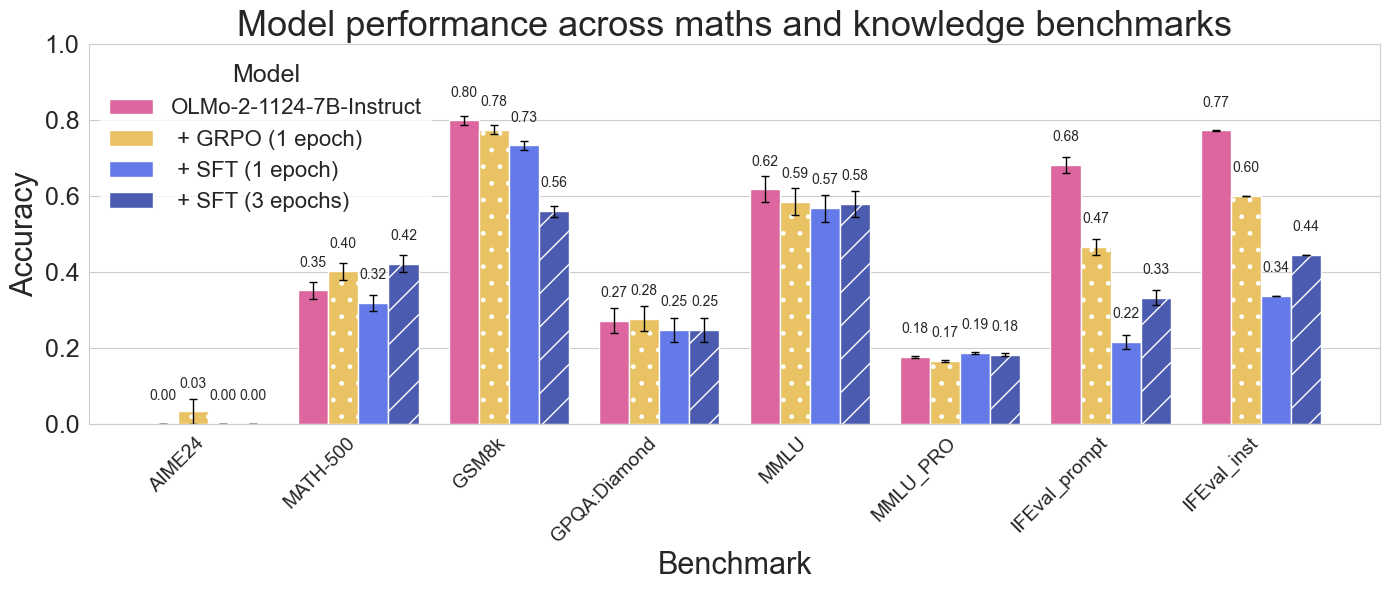

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create DataFrame from the data with standard deviations
data = {
    'Model': [
        'OLMo-2-1124-7B-Instruct',
        ' + GRPO (1 epoch)',
        ' + SFT (1 epoch)',
        ' + SFT (3 epochs)',
    ] * 8,
    
    'Benchmark': [benchmark for benchmark in [
        'AIME24', 'MATH-500', 'GSM8k', 'GPQA:Diamond', 
        'MMLU', 'MMLU_PRO', 'IFEval_prompt', 'IFEval_inst'
    ] for _ in range(4)],
    
    'Accuracy': [
        # AIME24
        0.0000, 0.0333, 0.0000, 0.0000,
        # MATH-500
        0.352, 0.402, 0.3200, 0.422,
        # GSM8k
        0.7998, 0.7756, 0.7339, 0.5603,
        # GPQA:Diamond
        0.2727, 0.2778, 0.2475, 0.2475,
        # MMLU
        0.6180, 0.5858, 0.5684, 0.5788,
        # MMLU_PRO
        0.1764, 0.1666, 0.1875, 0.1829,
        # IFEval prompt_level
        0.6821, 0.4658, 0.2163, 0.3327,
        # IFEval inst_level
        0.7734, 0.6007, 0.3369, 0.4448
    ],
    
    'Std_Dev': [
        # AIME24
        0.0000, 0.0333, 0.0000, 0.0000,
        # MATH-500
        0.0214, 0.0219, 0.0209, 0.0221,
        # GSM8k
        0.0110, 0.0115, 0.0122, 0.0137,
        # GPQA:Diamond
        0.0317, 0.0319, 0.0307, 0.0307,
        # MMLU
        0.0344, 0.0347, 0.0351, 0.0347,
        # MMLU_PRO
        0.0035, 0.0034, 0.0036, 0.0035,
        # IFEval prompt_level
        0.0200, 0.0215, 0.0177, 0.0203,
        # IFEval inst_level
        0.0005, 0.0005, 0.0005, 0.0005
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create the plot
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Custom color palette
custom_palette = {
    'OLMo-2-1124-7B-Instruct': '#F0529c',     # OLMo pink
    ' + GRPO (1 epoch)': '#FFCC4D',           # OLMo tea
    ' + SFT (1 epoch)': '#4D6BFE',     # DeepSeek blue
    ' + SFT (3 epochs)': '#3A50C0'     # Darker blue
}

# Plot without error bars first
ax = sns.barplot(x="Benchmark", y="Accuracy", hue="Model", data=df, palette=custom_palette)

# Get the handles and labels for the legend
handles, labels = ax.get_legend_handles_labels()

# IMPORTANT: Store the original bar containers before adding anything else
original_containers = list(ax.containers)

# Update the legend
# Update the legend with a box and opaque background
ax.legend(handles=handles, labels=labels, title="Model", loc='upper left', 
          fontsize=16, title_fontsize=18, frameon=True, 
          facecolor='white', edgecolor='white')

# Apply hatching patterns using original containers
for i, container in enumerate(original_containers):
    if i == 1:  # OLMo-2-GRPOv01.14 (yellow)
        for bar in container:
            bar.set_hatch('.')
    elif i == 3:  # OLMo-2-SFTv02.08_3epochs (dark blue)
        for bar in container:
            bar.set_hatch('/')

# Now add error bars manually
x_positions = []
for i, container in enumerate(original_containers):
    for j, bar in enumerate(container):
        x_positions.append(bar.get_x() + bar.get_width()/2)

# Reshape to match our data structure (4 models, 8 benchmarks)
x_positions = np.array(x_positions).reshape(len(original_containers), -1)

# Add error bars for each model group
for i, container in enumerate(original_containers):
    # Get the standard deviations for this model
    model_name = labels[i]
    std_devs = df[df['Model'] == model_name]['Std_Dev'].values
    
    # Add error bars at the correct x positions
    plt.errorbar(
        x=x_positions[i], 
        y=df[df['Model'] == model_name]['Accuracy'].values,
        yerr=std_devs,
        fmt='none',
        ecolor='black',
        elinewidth=1,
        capsize=3
    )

# Customize the rest of the plot
plt.title("Model performance across maths and knowledge benchmarks", fontsize=26)
plt.xlabel("Benchmark", fontsize=22)
plt.ylabel("Accuracy", fontsize=22)
plt.ylim(0, 1.0)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=18)


# Add value labels on the bars using original containers
for container in original_containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10, padding=15)  # Increased font size and padding

plt.tight_layout()
plt.savefig('figures/sec3/benchmarks.pdf', bbox_inches='tight')


## Benchmarks after freezing for paper

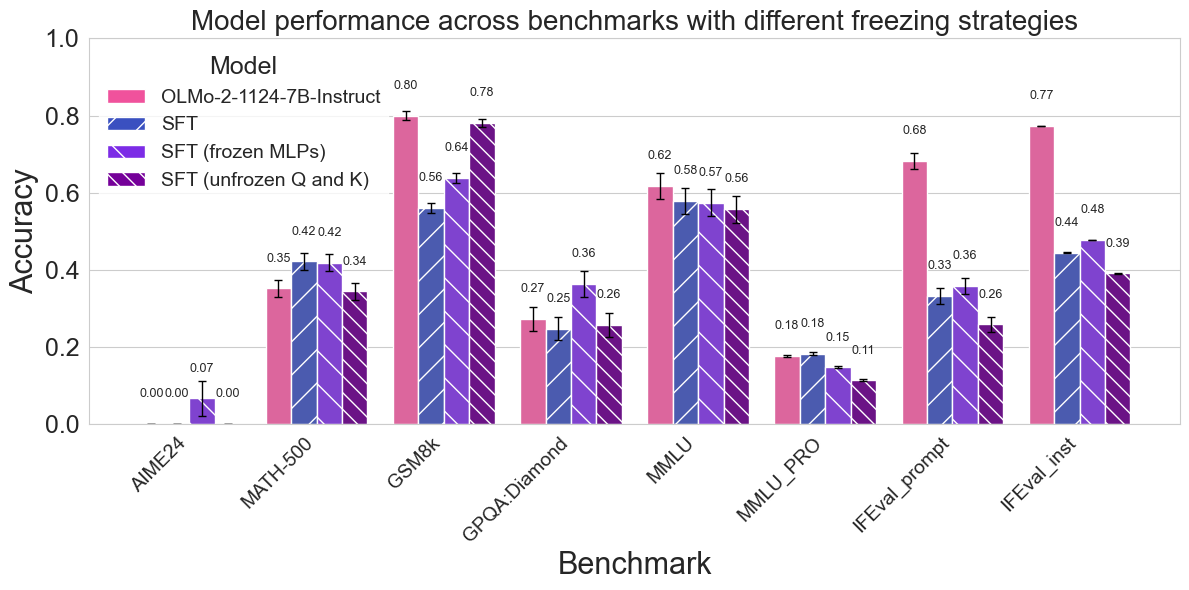

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

# Create DataFrame from the new data with standard deviations
data = {
    'Model': [
        'allenai/OLMo-2-1124-7B-Instruct',
        'Neelectric/OLMo-2-1124-7B-Instructct_SFTv02.08_3epochs',
        'Neelectric/OLMo-2-1124-7B-Instruct_SFTv02.08_frozen',
        'Neelectric/OLMo-2-1124-7B-Instruct_SFTv02.08_unfrozen_qk',
    ] * 8,
    
    'Benchmark': [benchmark for benchmark in [
        'AIME24', 'MATH-500', 'GSM8k', 'GPQA:Diamond', 
        'MMLU', 'MMLU_PRO', 'IFEval_prompt', 'IFEval_inst'
    ] for _ in range(4)],
    
    'Accuracy': [
        # AIME24
        0.0000, 0.0000, 0.0667, 0.0000,
        # MATH-500
        0.352, 0.422, 0.418, 0.3440,
        # GSM8k
        0.7998, 0.5603, 0.6384, 0.7809,
        # GPQA:Diamond
        0.2727, 0.2475, 0.3636, 0.2576,
        # MMLU
        0.6180, 0.5788, 0.5736, 0.5576,
        # MMLU_PRO
        0.1764, 0.1829, 0.1474, 0.1138,
        # IFEval prompt_level
        0.6821, 0.3327, 0.3586, 0.2588,
        # IFEval inst_level
        0.7734, 0.4448, 0.4772, 0.3909
    ],
    
    'Std_Dev': [
        # AIME24
        0.0000, 0.0000, 0.0463, 0.0000,
        # MATH-500
        0.0214, 0.0221, 0.0221, 0.0213,
        # GSM8k
        0.0110, 0.0137, 0.0132, 0.0114,
        # GPQA:Diamond
        0.0317, 0.0307, 0.0343, 0.0312,
        # MMLU
        0.0344, 0.0347, 0.0348, 0.0350,
        # MMLU_PRO
        0.0035, 0.0035, 0.0032, 0.0029,
        # IFEval prompt_level
        0.0200, 0.0203, 0.0206, 0.0188,
        # IFEval inst_level
        0.0005, 0.0005, 0.0005, 0.0005
    ]
}

# Create shorter display names for the models
model_display_names = {
    'allenai/OLMo-2-1124-7B-Instruct': 'OLMo-2-1124-7B-Instruct',
    'Neelectric/OLMo-2-1124-7B-Instructct_SFTv02.08_3epochs': 'SFT',
    'Neelectric/OLMo-2-1124-7B-Instruct_SFTv02.08_frozen': 'SFT (frozen MLPs)',
    'Neelectric/OLMo-2-1124-7B-Instruct_SFTv02.08_unfrozen_qk': 'SFT (unfrozen Q and K)'
}

# Create DataFrame
df = pd.DataFrame(data)

# Add display names
df['Model_Display'] = df['Model'].map(model_display_names)

# Create the plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

custom_palette = {
    'OLMo-2-1124-7B-Instruct': '#F0529c',     # OLMo pink
    'SFT': '#3A50C0',                          # Dark blue
    'SFT (frozen MLPs)': '#7c2ce6',            # Medium purple
    'SFT (unfrozen Q and K)': '#750099' # Dark purple
}

# Plot without error bars first
ax = sns.barplot(x="Benchmark", y="Accuracy", hue="Model_Display", data=df, palette=custom_palette)

# Get the handles and labels for the legend
handles, labels = ax.get_legend_handles_labels()

# IMPORTANT: Store the original bar containers before adding anything else
original_containers = list(ax.containers)

# Update the legend
# ax.legend(handles=handles, labels=labels, title="Model", loc='upper left', 
#           fontsize=14, title_fontsize=18, frameon=True, 
#           facecolor='white', edgecolor='white')

# Apply hatching patterns using original containers
for i, container in enumerate(original_containers):
    if i == 1:  # SFT (3 epochs)
        for bar in container:
            bar.set_hatch('/')
    elif i == 2:
        for bar in container:
            bar.set_hatch('\\')
    elif i == 3:  # SFT (unfrozen_qk)
        for bar in container:
            bar.set_hatch('\\\\')
            
custom_patches = []
for i, label in enumerate(labels):
    color = custom_palette[label]
    hatch_pattern = ''
    if i == 1:  # SFT (3 epochs)
        hatch_pattern = '/'
    elif i == 2:  # SFT (frozen MLPs)
        hatch_pattern = '\\'
    elif i == 3:  # SFT (unfrozen Q and K)
        hatch_pattern = '\\\\'
    custom_patches.append(Patch(facecolor=color, hatch=hatch_pattern, label=label))

# Add the new legend with custom patches
ax.legend(handles=custom_patches, title="Model", loc='upper left', 
          fontsize=14, title_fontsize=18, frameon=True, 
          facecolor='white', edgecolor='white')

            
            


# Now add error bars manually
x_positions = []
for i, container in enumerate(original_containers):
    for j, bar in enumerate(container):
        x_positions.append(bar.get_x() + bar.get_width()/2)

# Reshape to match our data structure (4 models, 8 benchmarks)
x_positions = np.array(x_positions).reshape(len(original_containers), -1)

# Add error bars for each model group
for i, container in enumerate(original_containers):
    # Get the model display name
    model_display = labels[i]
    # Get the corresponding original model name
    model_name = [k for k, v in model_display_names.items() if v == model_display][0]
    # Get the standard deviations for this model
    std_devs = df[df['Model'] == model_name]['Std_Dev'].values
    
    # Add error bars at the correct x positions
    plt.errorbar(
        x=x_positions[i], 
        y=df[df['Model'] == model_name]['Accuracy'].values,
        yerr=std_devs,
        fmt='none',
        ecolor='black',
        elinewidth=1,
        capsize=3
    )

# Customize the rest of the plot
plt.title("Model performance across benchmarks with different freezing strategies", fontsize=20)
plt.xlabel("Benchmark", fontsize=22)
plt.ylabel("Accuracy", fontsize=22)
plt.ylim(0, 1.0)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=18)

# Add value labels on the bars using original containers
for container in original_containers:
    ax.bar_label(container, fmt='%.2f', fontsize=9, padding=17)

plt.tight_layout()
plt.savefig('figures/sec4/freezing.pdf', bbox_inches='tight')